## PART 3: RECOMMENDATION SYSTEMS & CLUSTERING

### **A}** Recommendation systems

> INTRODUCTION 
* A **Recommendation System** predicts user preferences to suggest items they will like.
* Help navigate massive inventories e.g Spotify song suggestion.
* **Long-tail concept**:
    * Many niche products are less popular but still valuable while a few popular products are frequently consumed.
    * This concept allow companies to make profits by selling low volumes of hard to find items to many customers instead of only selling large volumes of a reduced nb of popular items.
> TYPES OF RECOMMENDATION SYSTEMS
1. **Unpersonalized Recommendations**
    * These recommendations are based on global trends & are not tailored to any specific users. 
    * i.e Youtube recommending most popular videos.
    * Useful for general content (news) but it's not niche based.
2. **Personalized Recommendations**
    * Tailored based on a user's profile (past behavior, preferences) & context(browsing history)
    * The goal is to predict a relevance score for unseen items & recommend them.
> APPROACHES OF RECOMMENDATION SYSTEMS
1. **Collaborative Filtering** {CF}
    * Recommends items based on past interactions of users {*user-item interaction matrix*}
    * It finds similarities btn users or items & predicts preferences. 
    * The goal is to predict user preferences {numerical rating or Top-N recommendations} based on user behavior{ratings}
    * **DISADVANTAGE**
        * Cold start problem - it's hard to recommend items without prior user activity.
2. **Content-based filtering**{CBF}
    * Recommends items based on features of the items themselves.
    * i.e if you like sci-fi movies, it recommends more sci-fi movies.  

| Pros | Cons |
| ---- | ---- |
| Offers transparent recommendations based on item similarities | Requires detailed tagging or feature extraction |  


> TYPES OF COLLABORATIVE FILTERING
1. **User-based Collaborative Filtering**
    * Finds users similar to a given user then recommends items that those similar users liked.
2. **Item-based Collaborative Filtering**
    * Finds items similar to a given item then recommends those items to users who liked the original item.

> APPROACHES OF COLLABORATIVE FILTERING
1. *Memory-based*:  Uses entire user-item interaction matrix
2. *Model-based*: Learns patterns from data using ML Models.  

| Memory-based | model-based |
| ----  | ---- |
| Requires complete data | uses learned abstractions that represent input data |
| Doesn't scale well | scales much better |
| No pre-computation | Enables pre-computation |
| relies on similarity metrics btn users and items | relies on matrix factorization |

> MATRIX FACTORIZATION
* A key technique in Collaborative filtering.
* it decomposes the user-item interaction matrix into two lower-dimensional matrices {user factors & item factors}
* These factors capture latent features that explain the interactions.
> MATRIX FACTORIZATION TECHNIQUES
1. **Singular Value Decomposition (SVD)**
    * Decomposes a matrix into 3 matrices: 
       * where : A=UΣV^T
       * U = user features, V = item features &  Σ contains singular values.
    * Helps reduce dimensionality & discover patterns in user preferences
2. **Alternating Least Square (ALS)**
    * Optimizes the factorization by alternating btn fixing user factors & optimizing item factors then vice versa
    * Works well with sparse data {commonly found in recommendation systems}   
> KEY SIMILARITY METRICS 
* Cosine similarity  
* Euclidean distance  
* Pearson Correlation  
* Jaccard Index(Binary data)  

> EMBEDDINGS
* **User & Item Embeddings**: Latent factors rep abstract qualities of users & items  {i.e User preferences for genres }

### **B}** COLLABORATIVE FILTERING WITH SVD IN PYTHON

In [1]:
from scipy.sparse import csc_matrix # It creates a sparse matrix
from scipy.sparse.linalg import svds # It performs svd on the matrix

# Matrix A rep utility matrix with users as rows & items as columns
# Sparse matrix A has some predefined user-item ratings

A = csc_matrix([
    [1,0,0], # user 1 ratings
    [5,0,2], # user 2 ratings
    [0,1,0], # user 3 ratings
    [0,0,3], # user 4 ratings
    [4,0,9]], dtype=float) # user 5 ratings

# perform SVD on matrix A, svds decomposes A into 3 matrices: U, Sigma (Σ), and VT
# k=2 means we are reducing matrix to 2 latent factors

u, s, vt = svds(A, k=2)
print(u, s, vt)

print(" ")
print("A: \n", A.toarray()) # convert sparse matrix to dense formatt for easy viewing
print("")

# U reps user factors, s reps singular values & V.T reps item features
print(f"User Features:\n {u}") # shows user embeddings(latent factors for users)
print(f"Singular Values:\n {s}") # singular values in diagonal matrix Σ
print(f"Item Features:\n {vt}") # shows item embeddings(latent factors for items)

[[-2.21829477e-01  4.58445949e-02]
 [-8.50288016e-01  3.86369035e-01]
 [-2.14780401e-19 -2.00071339e-20]
 [ 3.88289052e-01  2.35719092e-01]
 [ 2.77549248e-01  8.90535654e-01]] [ 3.89366418 10.99269663] [[-8.63729488e-01 -8.36282754e-19  5.03955724e-01]
 [ 5.03955724e-01 -2.19932353e-19  8.63729488e-01]]
 
A: 
 [[1. 0. 0.]
 [5. 0. 2.]
 [0. 1. 0.]
 [0. 0. 3.]
 [4. 0. 9.]]

User Features:
 [[-2.21829477e-01  4.58445949e-02]
 [-8.50288016e-01  3.86369035e-01]
 [-2.14780401e-19 -2.00071339e-20]
 [ 3.88289052e-01  2.35719092e-01]
 [ 2.77549248e-01  8.90535654e-01]]
Singular Values:
 [ 3.89366418 10.99269663]
Item Features:
 [[-8.63729488e-01 -8.36282754e-19  5.03955724e-01]
 [ 5.03955724e-01 -2.19932353e-19  8.63729488e-01]]


> Recreating The oringal Matrix

In [2]:
import numpy as np

# We multiply the decomposed matrices U, Σ, and V.T
# np.diag creates a diagonal matrix from singular values
reconstructed_matrix = u.dot(np.diag(s).dot(vt))
print(f"Approximation of rating matrix:\n {reconstructed_matrix}")
print(" ")

# Round off to get integer values, best for comparison
print(f"Rounded Approximation of rating matrix:\n {np.round(reconstructed_matrix)}")


Approximation of rating matrix:
 [[ 1.00000000e+00  6.11485906e-19 -5.55111512e-17]
 [ 5.00000000e+00  1.83460645e-18  2.00000000e+00]
 [ 6.11485906e-19  7.47739084e-37 -6.11411539e-19]
 [ 0.00000000e+00 -1.83423462e-18  3.00000000e+00]
 [ 4.00000000e+00 -3.05676023e-18  9.00000000e+00]]
 
Rounded Approximation of rating matrix:
 [[ 1.  0. -0.]
 [ 5.  0.  2.]
 [ 0.  0. -0.]
 [ 0. -0.  3.]
 [ 4. -0.  9.]]


### **C}** K- MEANS CLUSTERING

> OVERVIEW
* It groups data into clusters where intra-class similarity{*Similarity among members of same grp*} is high & inter-class similarity{*Similarity of diff grps is low*} is low.
* Similarity in terms of distance. The closer two points are the more similar they are.
> TYPES OF CLUSTERING
1. **Hierarchical Algorithm**: Builds clusters step by step either by i) Merging clusters or ii) Splitting clusters
2. **Non-Hierarchical Algorithm(K-means)**: Divides data into pre-specified number of clusters, iteratively refining them.
> KEY CONCEPTS & STEPS
* K is predefined - nb of clusters are set beforehand.
* **Centroid Update** : Clusters' centers are recalculated after each iterations.
* K-means clustering also is an iterative algo that reaches for a pre-determined nb of clusters within an unbalanced dataset & follows the fwg steps:
    * 1. Initialize K centroids
    * 2. Assign each pt to the cluster which is closest.
    * 3. Recompute the cluster centroids
    * 4. Reassign the observations to one of the clusters according to some rule.
    * 5. Stop if there is no reallocation
> EVALUATION OF CLUSTER FITNESS
1. **Variance Ratio {Calinski-Harabasz Score}**
   * Evaluates cluster tightness & separation
2. **Silhouette Score**
    * Another metric for cluster fitness
> ELBOW PLOT
       
**PURPOSE**: It helps to find the optimal value of k  
**HOW TO INTERPRET**: Look for the elbow in the plot, where adding more clusters offers diminishing returns in cluster quality.

### **D}** HIERARCHICAL AGGLOMERATIVE CLUSTERING {HAC}

> UNDERSTANDING HAC
* **Agglomerative Clustering**: Starts with each data pt as its own cluster & merges the closest clusters iteratively until only one remains or a stopping criterion {like a specific nb of clusters is met}
> LINKING SIMILAR CLUSTERS
* Linkage Criteria determines how to measure closest clusters
* Scikit-Learn provides 3 linkage criteria:
  * 1. **WARD**: 
      * Picks 2 clusters to merge in a way that the variance within all clusters increases the least leading to fairly equally sized.
      * Minimizes variance within clusters{Creates equally sized clusters}
  * 2. **AVERAGE**:
      * Merges 2 clusters that have the smallest average distance btn all the pts.
      * Minimizes the average distance btn all pts in 2 clusters.
  * 3. **COMPLETE / MAXIMUM LINKAGE**
      * Merges 2 clusters that have the smallest maximum distance btn their pts.
      * Minimizes the maximum distance btn pts in 2 clusters.
> VISUALIZATION TOOLS
* **DENDOGRAM**: It visualizes the hierarchy of clusters.
                This helps determine the nbs of clusters by cutting at a desired distance.

| HAC  | K-means |
| ---- | ---- |
| No predefined nb of clusters | Predefined nb of clusters |
| Clusters within clusters | No subgroups within clusters |
| Represented as a hierarchy | Clusters shift iteratively | 

> APPLICATION
* Market Segmentation, Photo Albums: 
    * HAC is used to organize hierarchical data like grouping photos by date, location & content.

### **E}** COMMON PROBLEMS WITH K-MEANS & HAC

> A} K-MEANS CLUSTERING  

| ADVANTAGES | DISADVANTAGES |
| -------   | ------- |
| Easy to implement | Choosing right value of k is crucial & challenging when unknown |
| Faster than HAC when dealing with many features | Sensitive to data scaling |
| Produce tight clusters as centroids move | Heavily influenced by initial positions of centroids. Poor initialization leads to bad clustering results |
|    | Multiple runs with diff initializations are needed to avoid bad results |

> B} HIERARCHICAL AGGLOMERATIVE CLUSTERING {HAC} 

| ADVANTAGES | DISADVANTAGES |
| ---- | ---- |
| Provides ordered structure of clusters that are useful for visualizations { i.e Dendograms} | Results depend on the distance metrics used |
| Allows granular analysis, zooming  into clusters at diff levels | Early mis-grouping of objects can't be corrected leading to incorrect clustering |



> In both methods:

 * Visualizing high-dimensional data can be challenging.
 * Mistakes are harder to detect without proper metrics

### **F}** SEMI-SUPERVISED LEARNING & LOOK-ALIKE MODELS

* **Look-Alike Models** : Expands potential customer bases i.e Used mostly in business & marketing analytics.
* **Semi-supervised Learning**: Reduces the need for expensive human labeling making it practical where large amt of unlabeled data is available but only a small labeled set exists{deep learning}

##### 1. LOOK ALIKE MODELS

> OBJECTIVE
* Identify the potential valuable customers by finding those who resemble already known valuable ones.
> HOW IT WORKS
* Clustering algos are mainly used to segment valuable customers.
* A similarity metric {i.e Euclidean distance} compares new customers to known valuable customers.
* Direct marketing & resources are aimed at these customers who "look like" the valuable ones.
* This is a powerful method to prospect potential customers without detailed labeling or explicit data.

##### 2. SEMI-SUPERVISED LEARNING

> OBJECTIVE
* Uses a mix of labeled & pseudo-labeled data to train models.
> HOW IT WORKS
* Supervised models are first trained on a small labeled dataset.
* The trained model is used to generate pseudo-labels for the much larger unlabeled dataset. 
* A new dataset is created by combining the real labeled data with pseudo-labeled data.
* The model is restrained on comined dataset leading to better performance due to increased data volume

> CONSIDERATIONS
1. **Look-Alike Models**
* Check out for overgeneralized customer profiles
* Ensure similarity metrics align with business objectives
2. **Semi-Supervised Learning**
* Test rigorously with holdout sets to avoid feedback loops & incorrect pseudo-labeling which degrades performance.

### **G}** PRINCIPAL COMPONENTS ANALYSIS IN SCIKIT-LEARN 

> PCA is used to overcome the "curse of dimensionality" as it's a dimensionality reduction technique. 
* It captures most information from a dataset while reducing the nb of features by projecting this data on new axes {Principal Components }

> 1. GENERATE THE DATA

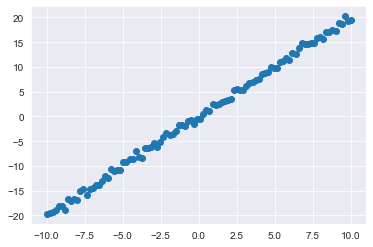

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Generate Linear data with some noise added
x1 = np.linspace(-10,10,100)
x2 = np.array([xi*2 + np.random.normal(loc=0, scale =0.5) for xi in x1])  # linear transformation of x1 & has some noise

# combine into a single dataset
X = np.asarray(list(zip(x1,x2)))

# plotting the data
sns.set_style("darkgrid")
plt.scatter(x1,x2)
plt.show()



> 2. PERFORM PCA WITH SCIKIT-LEARN 

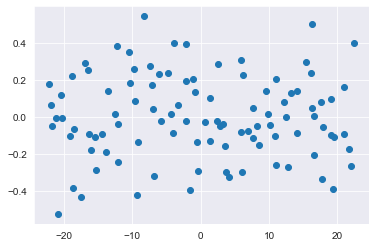

In [6]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA()

# fit & tranform the dataset
transformed = pca.fit_transform(X)

# Plot the transformed dataset
# transformed data is projected onto new principla axes(components)
plt.scatter(transformed[:,0], transformed[:,1]) # 
plt.show()

> 3. INSPECT RESULTS

In [9]:
# PCA produces two components that explain the variance of the dataset
# Accessing the components {eigenvectors}
print(f"Pca Components:\n {pca.components_}")  # principal axes of the transformed data

# Accessing the mean {used to center the data}
print(f"Pca mean:\n {pca.mean_}")        # mean of each feature

Pca Components:
 [[ 0.44515339  0.89545433]
 [-0.89545433  0.44515339]]
Pca mean:
 [7.10542736e-17 3.64052138e-02]


> 4. Plot the Principal Axes

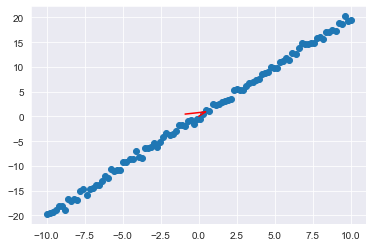

In [11]:
# Plots the original dataset
plt.scatter(x1,x2)

# Plot the Principal axes
ax1, ay1 = pca.mean_[0], pca.mean_[1]
ax2, ay2 = pca.mean_[0] + pca.components_[0][0], pca.mean_[1] + pca.components_[0][1]
ax3, ay3 = pca.mean_[0] + pca.components_[1][0], pca.mean_[1] + pca.components_[1][1]
plt.plot([ax1, ax2], [ay1, ay2], color = "red") 
plt.plot([ax2,ax3], [ay2,ay3], color = "red")
plt.show()

> 4.1 UNDERSTANDING WHAT HAPPENED

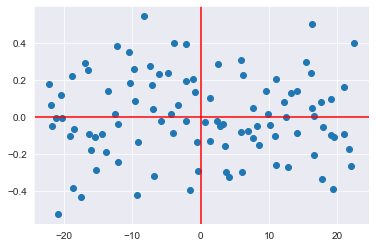

In [14]:
# Graph above shows how dataset is rotated onto the red axes
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red');

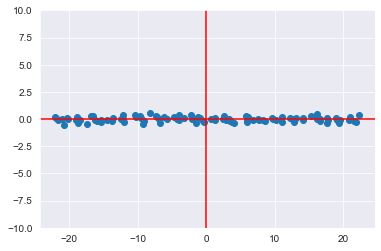

In [16]:
# Geographical interpretation of what happened when plotting principal axes
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red')
plt.ylim(-10,10);

> 5. DETERMINE THE EXPLAINED VARIANCE

In [17]:
# variance ratio explained by each component
# The first component captures most of the variance.
print(f"Explained variance Ratio: {pca.explained_variance_ratio_}")

# Cumulative explained variance
print(f"cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

Explained variance Ratio: [9.99711208e-01 2.88791672e-04]
cumulative explained variance: [0.99971121 1.        ]


* array([0.99971121 1.        ]) implies that the first component accounts for nearly 99.97% of the variance

> 6. VISUALIZE THE EXPLAINED VARIANCE
* visualize how much of the data structure is captured by the first principal component.
* Compare it to the transformed dataset on the principal axis

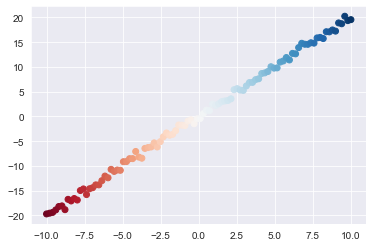

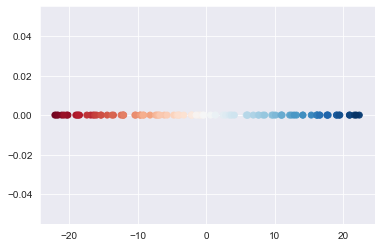

In [20]:
# scatter plot of the original data
plt.scatter(x1,x2, c=sns.color_palette("RdBu", n_colors=100))
plt.show()

# Plot of the data projected on the first component
plt.scatter(transformed[:,0], [0 for _ in range(100)], c=sns.color_palette('RdBu', n_colors=100))

* The **Covariance Matrix of the centered data** measures how variables change together
* **Eigen Vectors**: The covariance matrix's eigenvectors are the principal components. i.e print(pca.components_)
* **Eigen Values**: Indicaate how much variance each component explains. i.e print(pca.explained_variance_)

### **H}** MARKET SEGMENTATION WITH CLUSTERING

> INTRODUCTION
* Market segmentation is used alot for clustering
* **Market segmentation**: It uses clustering techniques to group customers with similar traits into segments.
* Understanding these segments allows a business to allocate resources more efficiently thus maximizing returns. e.g targeted advertising
* Scikit-learn for clustering, Tensorflow for neural clustering & PyCaret for ease of automation
> IDENTIFYING DIFFERENT MARKET SEGMENT
* Market segmentation allows us to differentiate customer groups that behave differently.
* Clustering algos e.g K-means identifies meaningful segments based on patterns in customer data.
> SEGMENTATION & TARGETING
1. Segmentation
   * Identify different customer groups using clustering 
2. Targeting 
   * Develop strategies to focus on the most valuable segments

E.G:   
Tesla Launches a New SUV.
   * They segment their market into {families vs luxury car enthusiasts}
   * They create ads highlighting features relevant to each group {Safety for families, luxury for hiher-income buyers}